# This is an implement of K means clustering

In [3]:
import numpy as np
import matplotlib.pyplot as plt

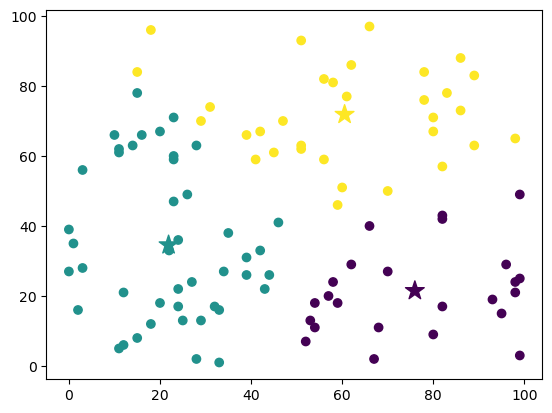

In [26]:
class KMeansClustering:
    def __init__(self, k=3):
        self.k = k
        self.centroids = None
    
    
    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids-data_point)**2, axis=1))
    
    # takes a sample of data and divides it into clusters
    def fit(self, X, max_iter=200):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))
        for i in range(max_iter):
            # step 1: label the data points
            y = []
            for data_point in X:
                distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)
            y = np.array(y)
            
            # step 2: calculate new cluster centers
            cluster_centers = []
            for i in range(self.k):
                cluster_centers.append(np.mean(X[y == i], axis=0))
            
            # step 3: update the cluster centers
            if np.max(self.centroids-np.array(cluster_centers)) < 0.0001: break
            else: self.centroids = np.array(cluster_centers)
            
        return y
        

def main():
    random_points = np.random.randint(0, 100, (100, 2))
    kmeans = KMeansClustering(k=3)
    labels = kmeans.fit(random_points)
    # plotting the result
    plt.scatter(*random_points.T, c=labels)
    plt.scatter(*kmeans.centroids.T, c=range(len(kmeans.centroids)), marker="*", s=200)
    
    
if __name__ == "__main__":
    main()